# Dataset Information

- **Name of dataset:** UCI Machine Learning Repository:

- **Dataset link:** [Air Quality](https://archive.ics.uci.edu/dataset/360/air+quality)

- **Dataset download:** [Download Dataset](https://archive.ics.uci.edu/static/public/360/air+quality.zip)

- **License:** Dataset is from UCI Machine Learning Repository, licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license. This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

- **Size:** AirQualityUCI.xlsx is 1.3MB


# Characteristics of this dataset:
- The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. 15 features, feature type includes date, categorical, integer, continuous. This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

In [2]:
import pandas as pd
import bqplot
import bqplot.pyplot as plt
import json
import pandas as pd 
import re
import numpy as np
import random
from functools import reduce
from ast import literal_eval
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# This shows feature information related to this dataste
1. **Date (DD/MM/YYYY):** Date of the measurements.
2. **Time (HH.MM.SS):** Time of the measurements.
3. **True hourly averaged concentration CO in mg/m^3 (reference analyzer):** Hourly averaged concentration of Carbon Monoxide in milligrams per cubic meter measured by the reference analyzer.
4. **PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted):** Hourly averaged sensor response of the tin oxide sensor, targeting CO.
5. **True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer):** Hourly averaged concentration of overall Non-Methanic Hydrocarbons in micrograms per cubic meter measured by the reference analyzer.
6. **True hourly averaged Benzene concentration in microg/m^3 (reference analyzer):** Hourly averaged concentration of Benzene in micrograms per cubic meter measured by the reference analyzer.
7. **PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted):** Hourly averaged sensor response of the titania sensor, targeting NMHC.
8. **True hourly averaged NOx concentration in ppb (reference analyzer):** Hourly averaged concentration of Nitrogen Oxides in parts per billion measured by the reference analyzer.
9. **PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted):** Hourly averaged sensor response of the tungsten oxide sensor, targeting NOx.
10. **True hourly averaged NO2 concentration in microg/m^3 (reference analyzer):** Hourly averaged concentration of Nitrogen Dioxide in micrograms per cubic meter measured by the reference analyzer.
11. **PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted):** Hourly averaged sensor response of the tungsten oxide sensor, targeting NO2.
12. **PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted):** Hourly averaged sensor response of the indium oxide sensor, targeting Ozone.
13. **Temperature in °C:** Temperature measured in degrees Celsius.
14. **Relative Humidity (%):** Relative humidity measured as a percentage.
15. **AH Absolute Humidity:** Absolute humidity measurement.


In [3]:
df = pd.read_excel('/Users/lynn/Desktop/courses/dataVisual/air+quality/AirQualityUCI.xlsx')
df

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
...         ...       ...     ...          ...       ...        ...   
9352 2005-04-04  10:00:00     3.1      1314.25      -200  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50      -200  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00      -200  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50      -200   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75      -200  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    113.0       1692.00   
1            954.75    103.0       1173.75     92.0       1558.75   
2            939.25    131.0       1140.00    114.0       1554.50   
3            948.25    172.0       1092.00    122.0       1583.75   
4            835.50    131.0       1205.00    116.0       1490.00   
...             ...      ...           ...      ...           ...   
9352        1101.25    471.7        538.50    189.8       1374.25   
9353        1027.00    353.3        603.75    179.2       1263.50   
9354        1062.50    293.0        603.25    174.7       1240.75   
9355         960.50    234.5        701.50    155.7       1041.00   
9356        1047.25    265.2        654.00    167.7       1128.50   

      PT08.S5(O3)       T         RH        AH  
0         1267.50  13.600  48.875001  0.757754  
1          972.25  13.300  47.700000  0.725487  
2         1074.00  11.900  53.975000  0.750239  
3         1203.25  11.000  60.000000  0.786713  
4         1110.00  11.150  59.575001  0.788794  
...           ...     ...        ...       ...  
9352      1728.50  21.850  29.250000  0.756824  
9353      1269.00  24.325  23.725000  0.711864  
9354      1092.00  26.900  18.350000  0.640649  
9355       769.75  28.325  13.550000  0.513866  
9356       816.00  28.500  13.125000  0.502804  

[9357 rows x 15 columns]

This data has 9357 rows and 15 columns. One reason I picked this dataset is the dataset is reasonable, and the feature type is diverse, which includes categorical, continuous, integer. And the dataset belongs to time series. Another reason is air quality is a very important topic in our daliy life, I search the air quality every day using my phone. I am glad to do a small research on air quality as I do care it.

we also would extract the data through python package

In [4]:

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
air_quality = fetch_ucirepo(id=360) 
  
# data (as pandas dataframes) 
X = air_quality.data.features 
y = air_quality.data.targets 
X


Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     3/10/2004  18:00:00     2.6         1360       150      11.9   
1     3/10/2004  19:00:00     2.0         1292       112       9.4   
2     3/10/2004  20:00:00     2.2         1402        88       9.0   
3     3/10/2004  21:00:00     2.2         1376        80       9.2   
4     3/10/2004  22:00:00     1.6         1272        51       6.5   
...         ...       ...     ...          ...       ...       ...   
9352   4/4/2005  10:00:00     3.1         1314      -200      13.5   
9353   4/4/2005  11:00:00     2.4         1163      -200      11.4   
9354   4/4/2005  12:00:00     2.4         1142      -200      12.4   
9355   4/4/2005  13:00:00     2.1         1003      -200       9.5   
9356   4/4/2005  14:00:00     2.2         1071      -200      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0              1046      166          1056      113          1692   
1               955      103          1174       92          1559   
2               939      131          1140      114          1555   
3               948      172          1092      122          1584   
4               836      131          1205      116          1490   
...             ...      ...           ...      ...           ...   
9352           1101      472           539      190          1374   
9353           1027      353           604      179          1264   
9354           1063      293           603      175          1241   
9355            961      235           702      156          1041   
9356           1047      265           654      168          1129   

      PT08.S5(O3)     T    RH      AH  
0            1268  13.6  48.9  0.7578  
1             972  13.3  47.7  0.7255  
2            1074  11.9  54.0  0.7502  
3            1203  11.0  60.0  0.7867  
4            1110  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
9352         1729  21.9  29.3  0.7568  
9353         1269  24.3  23.7  0.7119  
9354         1092  26.9  18.3  0.6406  
9355          770  28.3  13.5  0.5139  
9356          816  28.5  13.1  0.5028  

[9357 rows x 15 columns]

In [5]:
print(air_quality.metadata) 
print(air_quality.variables) 

{'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': {'title': 'On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario', 'authors': 'S. D. Vito, E. Massera, M. P

- check the missing data

In [6]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

this dataset does not have missing data, It is good. We do not handle missing data (data clean) steps.

- check data format

In [8]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

As we see, this dataset (feature types) are integer, continuous,and object(strings), datetime. But the format for feature 'Time', it's format should be the as same as the 'Date' feature. So I need to tranfer it's format into datetime.

- change the format of Time from object into datetime

In [9]:
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)
df['DateTime'] =  pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [11]:
df['DateTime']

0      2004-03-10 18:00:00
1      2004-03-10 19:00:00
2      2004-03-10 20:00:00
3      2004-03-10 21:00:00
4      2004-03-10 22:00:00
               ...        
9352   2005-04-04 10:00:00
9353   2005-04-04 11:00:00
9354   2005-04-04 12:00:00
9355   2005-04-04 13:00:00
9356   2005-04-04 14:00:00
Name: DateTime, Length: 9357, dtype: datetime64[ns]

- firstly, I wannt to see the value of true hourly average Benzene concentration in microg/m^3 in every day. So I subgroup the data by day, and got the average number of C6H6(GT), and then got line figure.

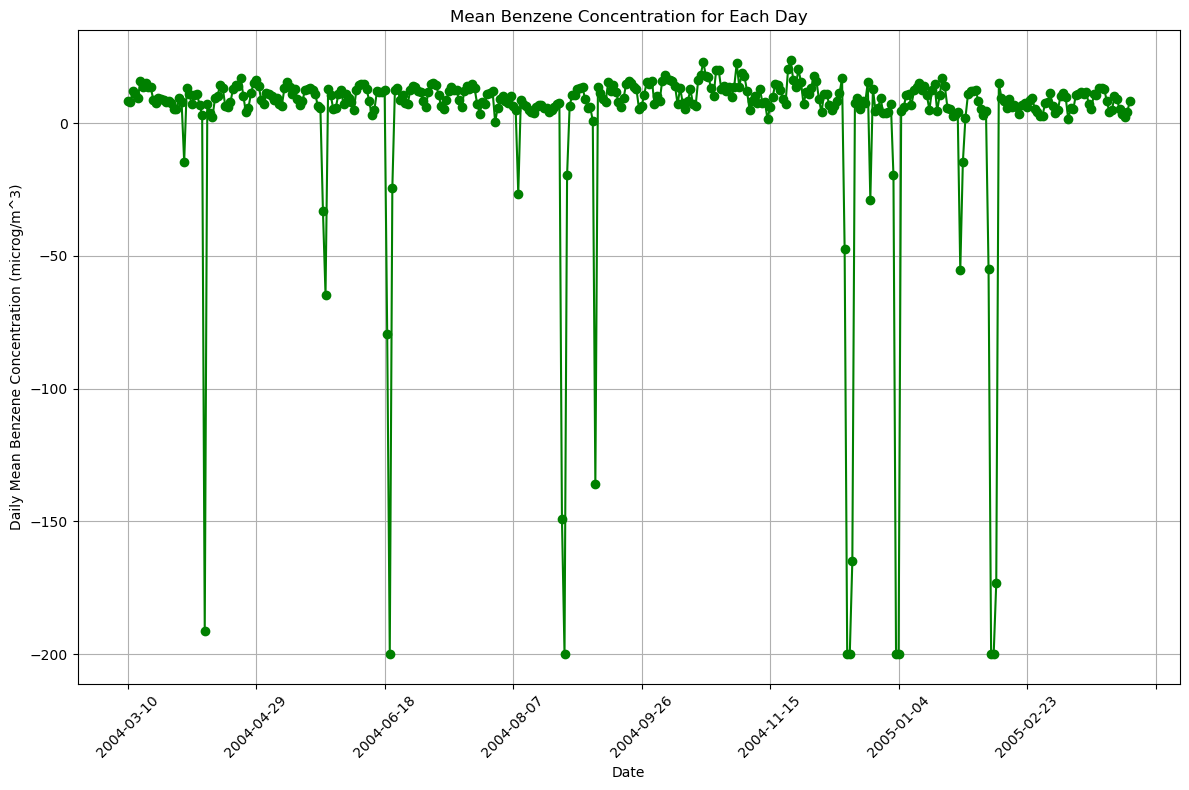

In [102]:
grouped_data = df.groupby('Date')['C6H6(GT)'].mean()
plt.figure(figsize=(12, 8))
grouped_data.plot(marker='o', linestyle='-',color='green')
plt.title('Mean Benzene Concentration for Each Day')
plt.xlabel('Date')
plt.ylabel('Daily Mean Benzene Concentration (microg/m^3)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- After geting the simple line plot, I want to show more information in one line plot. This dataset is continuees data, so it's better for us to use line plot to do presentation. Here, I want to compare the difference of C6H6(GT) on the 10th day in every month in 2004.

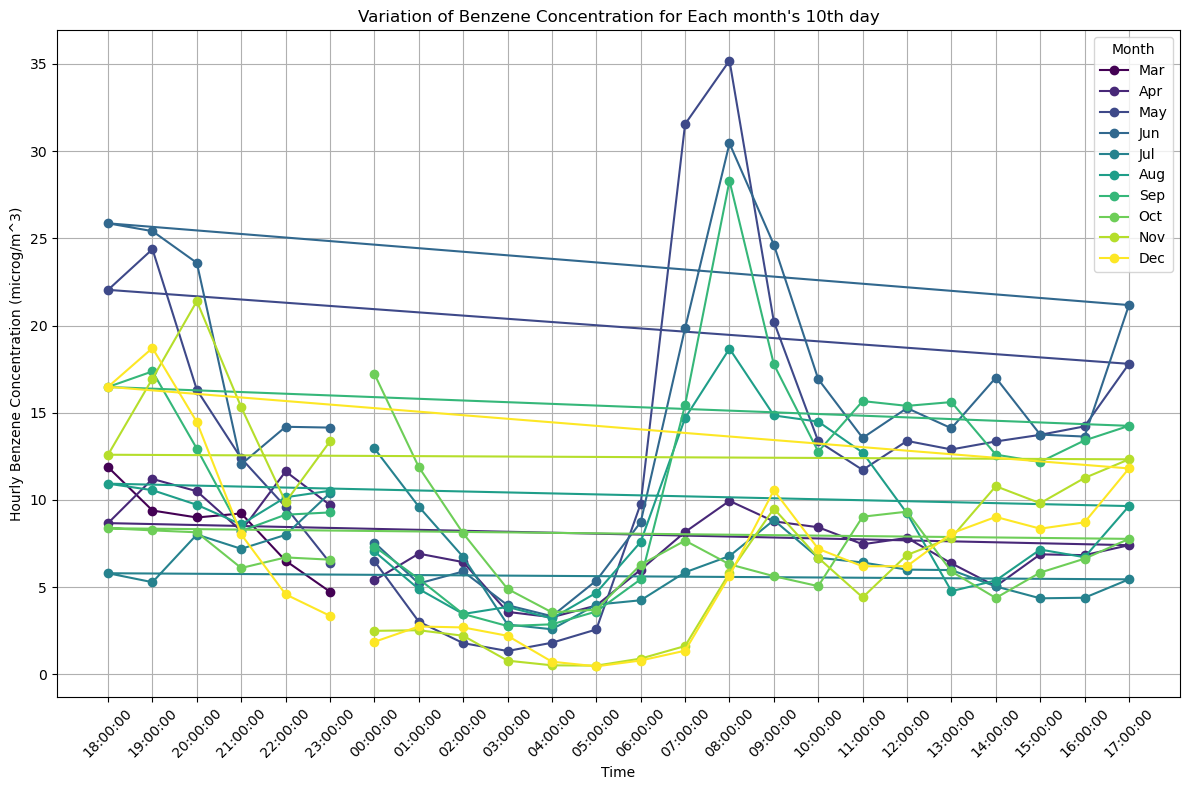

In [100]:
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)
df['DateTime'] =  pd.to_datetime(df['Date'] + ' ' + df['Time'])
filtered_data_2004 = df[df['DateTime'].dt.year == 2004]
data_day = filtered_data_2004[filtered_data_2004['DateTime'].dt.day == 10]
unique_months = data_day['DateTime'].dt.month.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_months)))
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
plt.figure(figsize=(12, 8))
for i, month in enumerate(unique_months):
    data_month =data_day[data_day['DateTime'].dt.month == month]
    plt.plot(data_month['Time'],data_month['C6H6(GT)'],marker='o', linestyle='-',color=colors[i],label=month_names[month])
plt.title("Variation of Benzene Concentration for Each month's 10th day")
plt.xlabel('Time')
plt.ylabel('Hourly Benzene Concentration (microg/m^3)')
plt.xticks(rotation=45)
plt.legend(title='Month', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()
      

- Here, we want to see precentage of each pullutant as main pollutant in hour. We could see the main pullutant is NO2 before 2004-08, the main pullutant is O3 after 2004-08, but it seems the air quality becomes better.

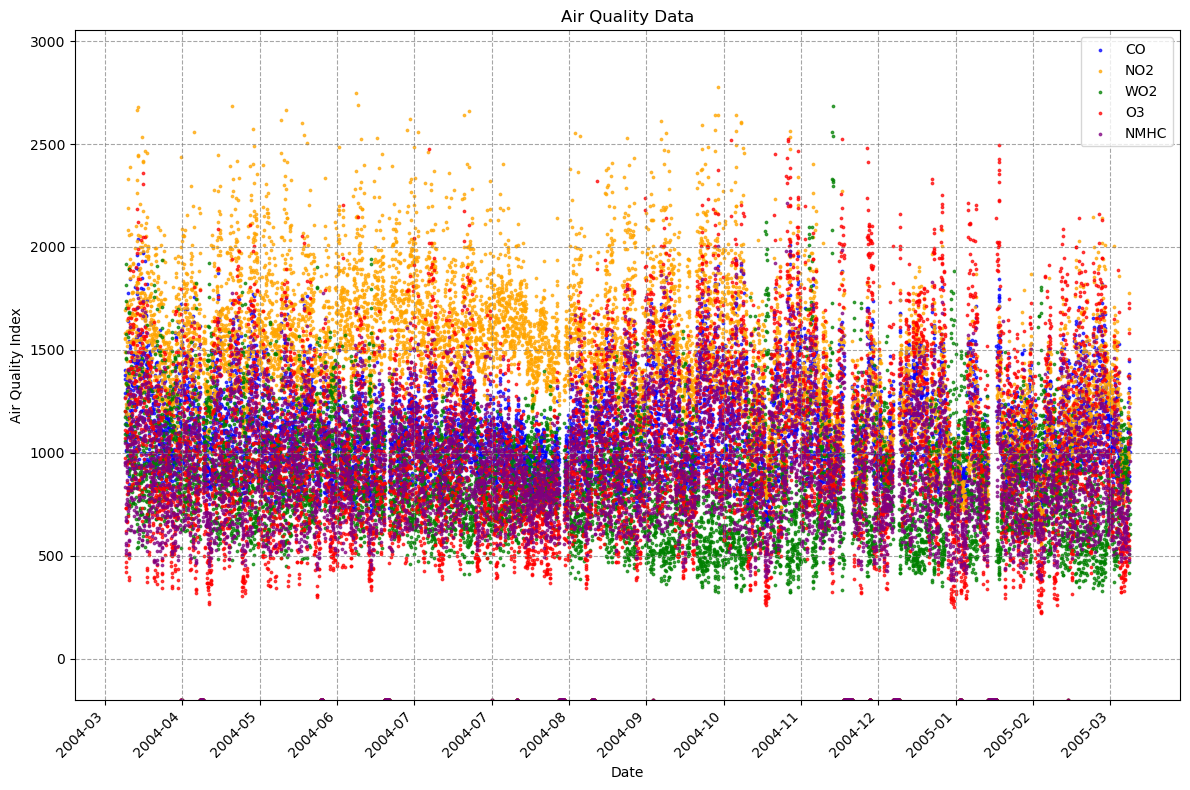

In [141]:
df = pd.read_excel('/Users/lynn/Desktop/courses/dataVisual/air+quality/AirQualityUCI.xlsx')
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)
df['DateTime'] =  pd.to_datetime(df['Date'] + ' ' + df['Time'])

co_data = df['PT08.S1(CO)']
no2_data = df['PT08.S4(NO2)']
NOx_data = df['PT08.S3(NOx)']
O3_data = df['PT08.S5(O3)']  
NMHC_data = df['PT08.S2(NMHC)']  
plt.figure(figsize=(12, 8))
plt.scatter(df['DateTime'] , co_data,  label='CO', alpha=0.7,s=3, color='blue')
plt.scatter(df['DateTime'] , no2_data,  label='NO2', alpha=0.7,s=3,color='orange')
plt.scatter(df['DateTime'] , NOx_data,  label='WO2', alpha=0.7,s=3,color='green')
plt.scatter(df['DateTime'] , O3_data,  label='O3', alpha=0.7,s=3,color='red')
plt.scatter(df['DateTime'] , NMHC_data,  label='NMHC', alpha=0.7,s=3,color='purple')
plt.xlabel('Date')
plt.ylabel('Air Quality Index')
plt.title('Air Quality Data')
plt.legend(loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.ylim(min(co_data.min(), no2_data.min(), ozone_data.min(), pm10_data.min(), pm25_data.min(), so2_data.min()), max(co_data.max(), no2_data.max(), ozone_data.max(), pm10_data.max(), pm25_data.max(), so2_data.max()) * 1.1)
plt.grid(True, linestyle='--', alpha=0.7,color='grey')
plt.tight_layout()
plt.show()

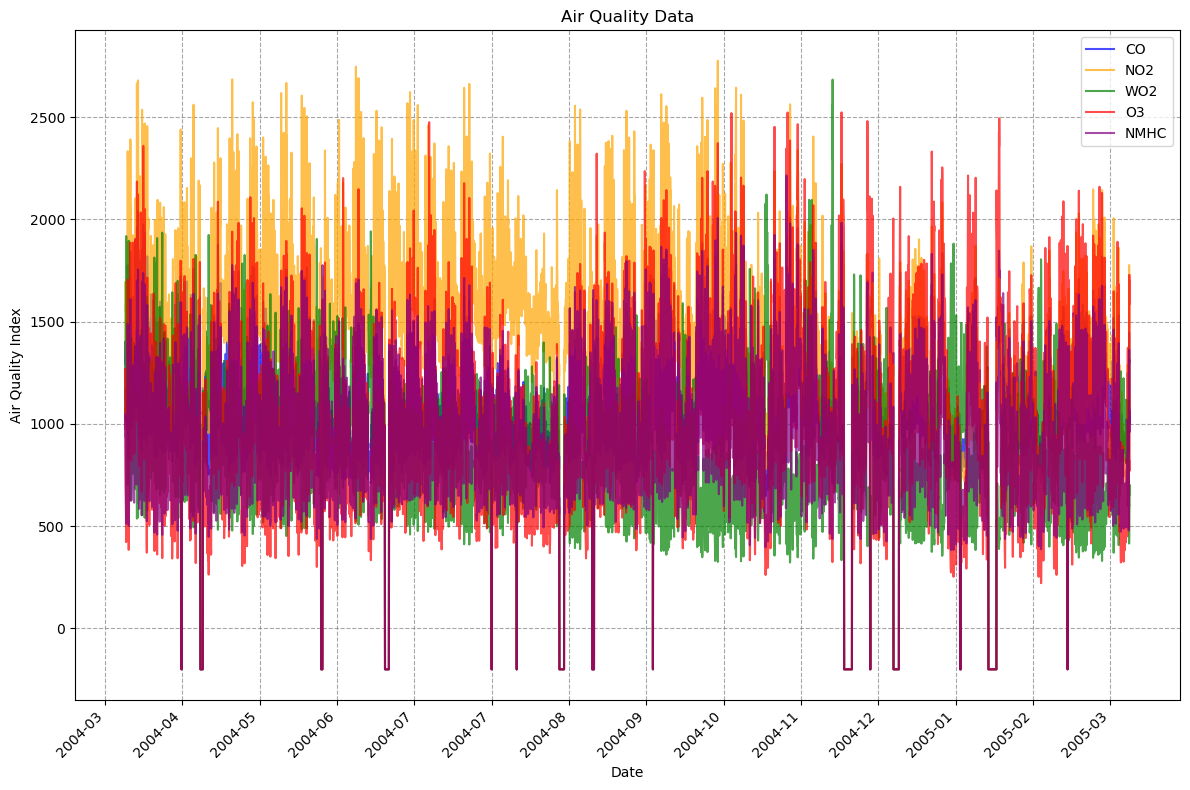

In [14]:
df = pd.read_excel('/Users/lynn/Desktop/courses/dataVisual/air+quality/AirQualityUCI.xlsx')
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)
df['DateTime'] =  pd.to_datetime(df['Date'] + ' ' + df['Time'])

co_data = df['PT08.S1(CO)']
no2_data = df['PT08.S4(NO2)']
NOx_data = df['PT08.S3(NOx)']
O3_data = df['PT08.S5(O3)'] 
NMHC_data = df['PT08.S2(NMHC)']  
plt.figure(figsize=(12, 8))
plt.plot(df['DateTime'] , co_data,  label='CO', alpha=0.7, color='blue')
plt.plot(df['DateTime'] , no2_data,  label='NO2', alpha=0.7,color='orange')
plt.plot(df['DateTime'] , NOx_data,  label='WO2', alpha=0.7,color='green')
plt.plot(df['DateTime'] , O3_data,  label='O3', alpha=0.7,color='red')
plt.plot(df['DateTime'] , NMHC_data,  label='NMHC', alpha=0.7,color='purple')
plt.xlabel('Date')
plt.ylabel('Air Quality Index')
plt.title('Air Quality Data')
plt.legend(loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.grid(True, linestyle='--', alpha=0.7,color='grey')
plt.tight_layout()
plt.show()

- I classfied the air quality into five level: good, moderate, unhealthy for sensitive groups, unhealthy, very unhealthy based on the value of CO(GT). Here, We could the see the precentage of the different air quality. It's easy to tell the purple dot (very unhealthy) took a very large area in the figure, so we could say the ait quality is not very good in this city. 

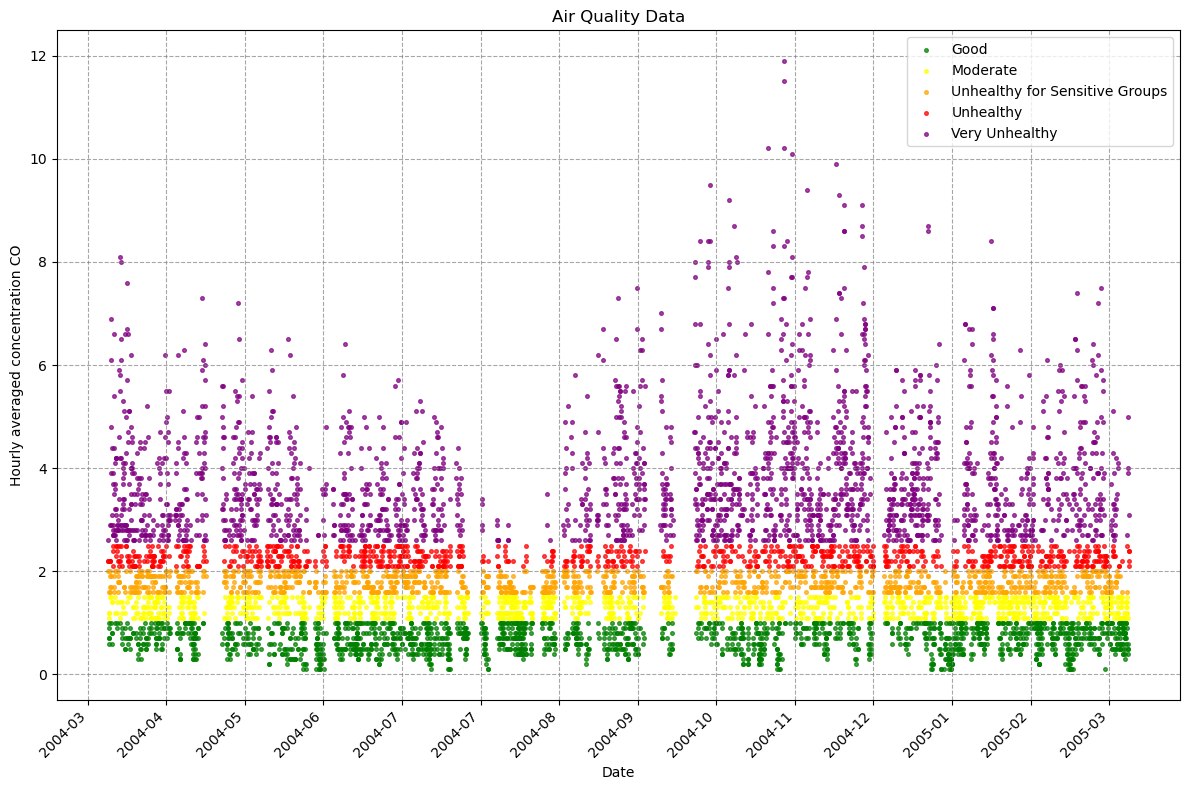

In [17]:
df = pd.read_excel('/Users/lynn/Desktop/courses/dataVisual/air+quality/AirQualityUCI.xlsx')
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)
df['DateTime'] =  pd.to_datetime(df['Date'] + ' ' + df['Time'])
df=df[df['CO(GT)']>0]
color_map = {'Good':'green', 'Moderate': 'yellow','Unhealthy for Sensitive Groups': 'orange', 'Unhealthy': 'red', 'Very Unhealthy':'purple'}
good=df[df['CO(GT)']<=1.0]
Moderate=df[(df['CO(GT)']<=1.5)& (df['CO(GT)']>1.0)]
Sensitive=df[(df['CO(GT)']<=2.0) & (df['CO(GT)']>1.5)]
unhealthy=df[(df['CO(GT)']<=2.5) & (df['CO(GT)']>2.0)]
very_unhealthy=df[df['CO(GT)']>2.5]
plt.figure(figsize=(12, 8))
plt.scatter(good['DateTime'],good['CO(GT)'], c=color_map['Good'],alpha=0.7,s=7,  label='Good')
plt.scatter(Moderate['DateTime'],Moderate['CO(GT)'], c=color_map['Moderate'], alpha=0.7,s=7, label='Moderate')
plt.scatter(Sensitive['DateTime'],Sensitive['CO(GT)'], c=color_map['Unhealthy for Sensitive Groups'], alpha=0.7,s=7, label='Unhealthy for Sensitive Groups')
plt.scatter(unhealthy['DateTime'],unhealthy['CO(GT)'], c=color_map['Unhealthy'], alpha=0.7,s=7, label='Unhealthy')
plt.scatter(very_unhealthy['DateTime'],very_unhealthy['CO(GT)'], c=color_map['Very Unhealthy'], alpha=0.7,s=7, label='Very Unhealthy')
plt.xlabel('Date')
plt.ylabel('Hourly averaged concentration CO')
plt.title('Air Quality Data')
plt.legend(loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.grid(True, linestyle='--', alpha=0.7,color='grey')
plt.tight_layout()
plt.show()


In [19]:
df = pd.read_excel('/Users/lynn/Desktop/courses/dataVisual/air+quality/AirQualityUCI.xlsx')
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)
df['DateTime'] =  pd.to_datetime(df['Date'] + ' ' + df['Time'])
def get_condition(co):
    if co <= 1.0:
        return 'Good'
    elif co <= 1.5:
        return 'Moderate'
    elif co <= 2.0:
        return 'Unhealthy for Sensitive Groups'
    elif co <= 2.5:
        return 'Unhealthy'
    else:
        return 'Very Unhealthy'

df['Condition'] = df['CO(GT)'].apply(get_condition)
df


Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0     2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1     2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2     2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3     2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4     2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
...          ...       ...     ...          ...       ...        ...   
9352  2005-04-04  10:00:00     3.1      1314.25      -200  13.529605   
9353  2005-04-04  11:00:00     2.4      1162.50      -200  11.355157   
9354  2005-04-04  12:00:00     2.4      1142.00      -200  12.374538   
9355  2005-04-04  13:00:00     2.1      1002.50      -200   9.547187   
9356  2005-04-04  14:00:00     2.2      1070.75      -200  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    113.0       1692.00   
1            954.75    103.0       1173.75     92.0       1558.75   
2            939.25    131.0       1140.00    114.0       1554.50   
3            948.25    172.0       1092.00    122.0       1583.75   
4            835.50    131.0       1205.00    116.0       1490.00   
...             ...      ...           ...      ...           ...   
9352        1101.25    471.7        538.50    189.8       1374.25   
9353        1027.00    353.3        603.75    179.2       1263.50   
9354        1062.50    293.0        603.25    174.7       1240.75   
9355         960.50    234.5        701.50    155.7       1041.00   
9356        1047.25    265.2        654.00    167.7       1128.50   

      PT08.S5(O3)       T         RH        AH            DateTime  \
0         1267.50  13.600  48.875001  0.757754 2004-03-10 18:00:00   
1          972.25  13.300  47.700000  0.725487 2004-03-10 19:00:00   
2         1074.00  11.900  53.975000  0.750239 2004-03-10 20:00:00   
3         1203.25  11.000  60.000000  0.786713 2004-03-10 21:00:00   
4         1110.00  11.150  59.575001  0.788794 2004-03-10 22:00:00   
...           ...     ...        ...       ...                 ...   
9352      1728.50  21.850  29.250000  0.756824 2005-04-04 10:00:00   
9353      1269.00  24.325  23.725000  0.711864 2005-04-04 11:00:00   
9354      1092.00  26.900  18.350000  0.640649 2005-04-04 12:00:00   
9355       769.75  28.325  13.550000  0.513866 2005-04-04 13:00:00   
9356       816.00  28.500  13.125000  0.502804 2005-04-04 14:00:00   

                           Condition  
0                     Very Unhealthy  
1     Unhealthy for Sensitive Groups  
2                          Unhealthy  
3                          Unhealthy  
4     Unhealthy for Sensitive Groups  
...                              ...  
9352                  Very Unhealthy  
9353                       Unhealthy  
9354                       Unhealthy  
9355                       Unhealthy  
9356                       Unhealthy  

[9357 rows x 17 columns]

- Show the total hours we could enjoy the good air quality, and the time suffer the unhealthy air quality, and the precent of hours of different air quality. One good news is tt shows we could enjoy a good air quality in the most time from the figure. However, we also will meet the very unhealthy weather frequently as the total hour of very unhealthy weather is sightly less than the total hous of good.

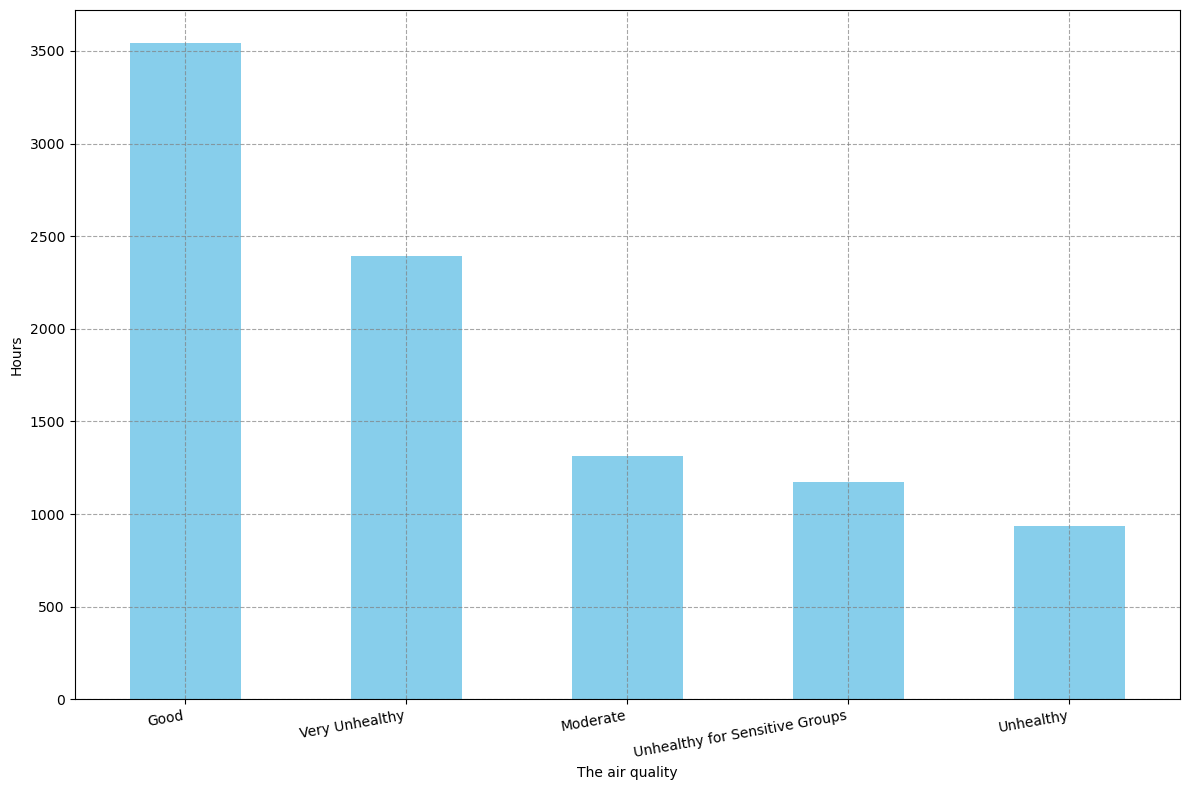

In [21]:
counts = df['Condition'].value_counts()
plt.figure(figsize=(12, 8))
counts.plot(kind='bar',color='skyblue')
plt.xticks(rotation=10, ha='right')
plt.xlabel('The air quality')
plt.ylabel('Hours')
plt.grid(True, linestyle='--', alpha=0.7,color='grey')
plt.tight_layout()
plt.show()

In [27]:
df['Condition'].value_counts()

Condition
Good                              3544
Very Unhealthy                    2393
Moderate                          1314
Unhealthy for Sensitive Groups    1171
Unhealthy                          935
Name: count, dtype: int64

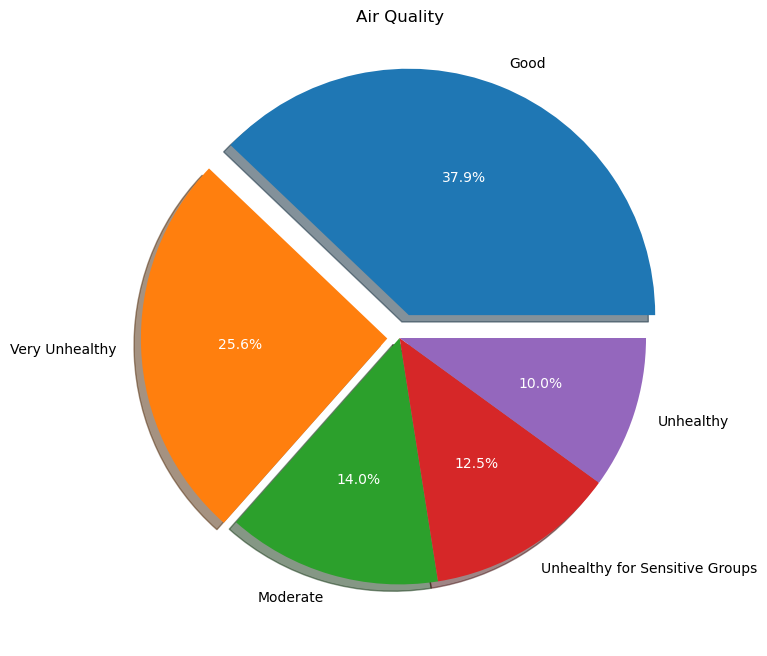

In [32]:
plt.figure(figsize=(12,8), dpi=100)
explode =[0.1,0.05,0,0,0]
label=['Good','Very Unhealthy','Moderate','Unhealthy for Sensitive Groups','Unhealthy']
_,_,autotexts = plt.pie(x= df['Condition'].value_counts(),labels=label,shadow=1,autopct='%.1f%%', explode=explode)
for autotext in autotexts:
    autotext.set_color('white')

plt.title('Air Quality')
plt.show()

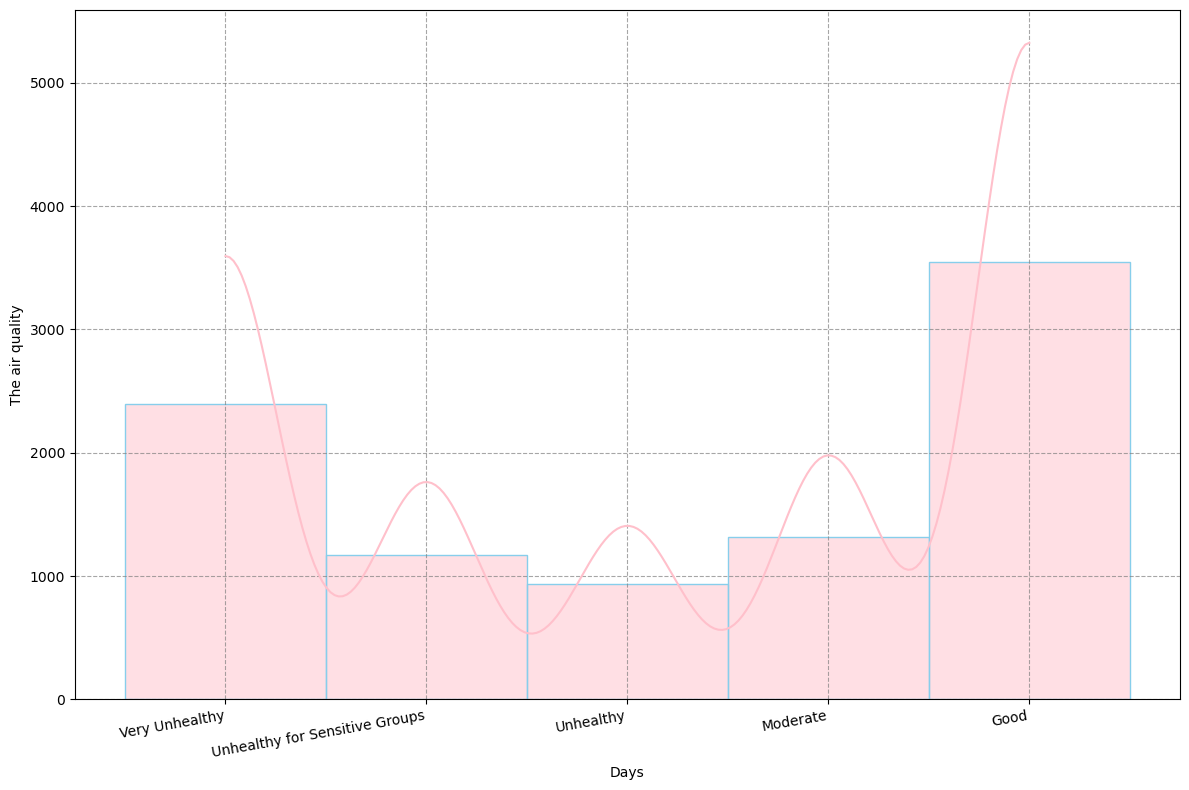

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.histplot(df['Condition'],kde=True,color='Pink',edgecolor='skyblue')
plt.xticks(rotation=10, ha='right')
plt.xlabel('Days')
plt.ylabel('The air quality')
plt.grid(True, linestyle='--', alpha=0.7,color='grey')
plt.tight_layout()
plt.show()

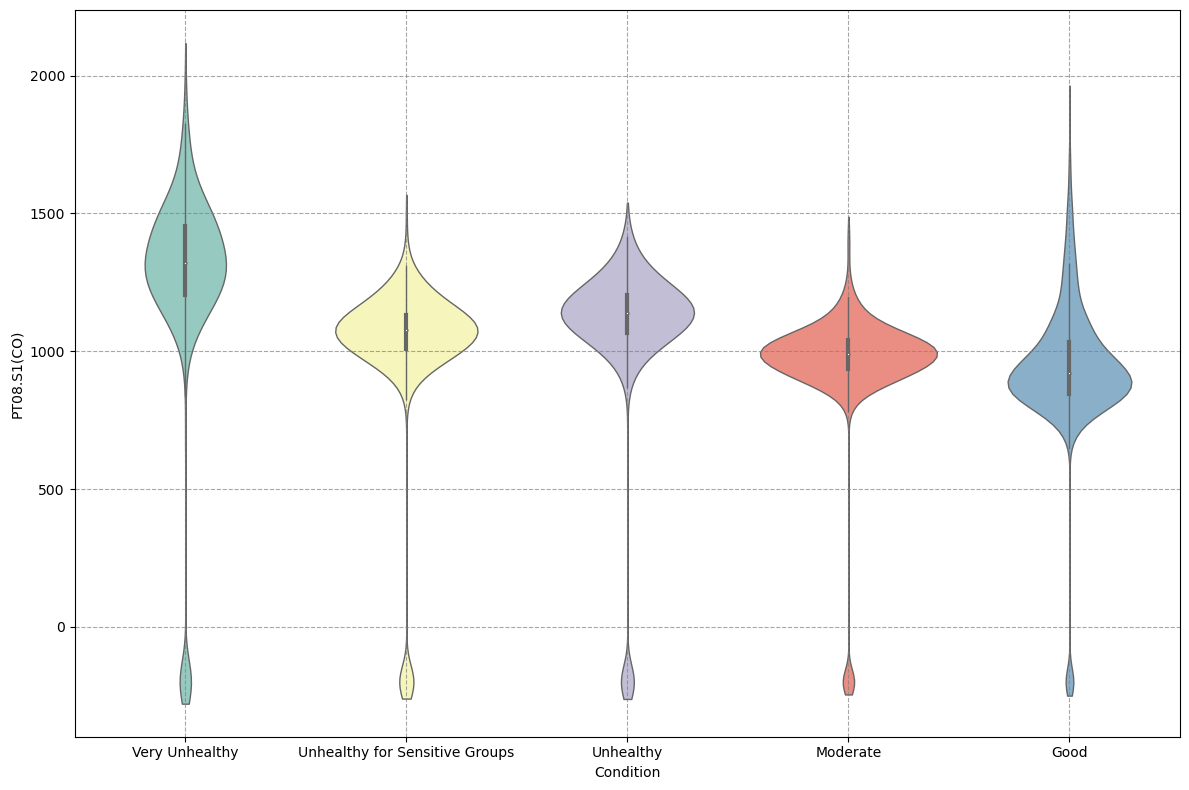

In [56]:
plt.figure(figsize=(12, 8))
sns.violinplot(x=df["Condition"], y=df["PT08.S1(CO)"],linewidth=1,cut=1,bw=0.2, palette='Set3')
plt.grid(True, linestyle='--', alpha=0.7,color='grey')
#sns.despine(left=True,bottom=True)
plt.tight_layout()
plt.show()

- The relationship between different features. I personally think it's important to analysis the relationship between different features. So I plotted the pair relationship map, we could see the there are postive linear relationship between some features like PTO8.S1(C0) and PTO8.S3(O3), and NOX is negatively related to O3.

In [48]:
df = pd.read_excel('/Users/lynn/Desktop/courses/dataVisual/air+quality/AirQualityUCI.xlsx')
def get_condition(co):
    if co <= 1.0:
        return 'Good'
    elif co <= 1.5:
        return 'Moderate'
    elif co <= 2.0:
        return 'Unhealthy for Sensitive Groups'
    elif co <= 2.5:
        return 'Unhealthy'
    else:
        return 'Very Unhealthy'

df['Condition'] = df['CO(GT)'].apply(get_condition)
df=df.iloc[:,2:]
df

CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0        2.6      1360.00       150  11.881723        1045.50    166.0   
1        2.0      1292.25       112   9.397165         954.75    103.0   
2        2.2      1402.00        88   8.997817         939.25    131.0   
3        2.2      1375.50        80   9.228796         948.25    172.0   
4        1.6      1272.25        51   6.518224         835.50    131.0   
...      ...          ...       ...        ...            ...      ...   
9352     3.1      1314.25      -200  13.529605        1101.25    471.7   
9353     2.4      1162.50      -200  11.355157        1027.00    353.3   
9354     2.4      1142.00      -200  12.374538        1062.50    293.0   
9355     2.1      1002.50      -200   9.547187         960.50    234.5   
9356     2.2      1070.75      -200  11.932060        1047.25    265.2   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)       T         RH  \
0          1056.25    113.0       1692.00      1267.50  13.600  48.875001   
1          1173.75     92.0       1558.75       972.25  13.300  47.700000   
2          1140.00    114.0       1554.50      1074.00  11.900  53.975000   
3          1092.00    122.0       1583.75      1203.25  11.000  60.000000   
4          1205.00    116.0       1490.00      1110.00  11.150  59.575001   
...            ...      ...           ...          ...     ...        ...   
9352        538.50    189.8       1374.25      1728.50  21.850  29.250000   
9353        603.75    179.2       1263.50      1269.00  24.325  23.725000   
9354        603.25    174.7       1240.75      1092.00  26.900  18.350000   
9355        701.50    155.7       1041.00       769.75  28.325  13.550000   
9356        654.00    167.7       1128.50       816.00  28.500  13.125000   

            AH                       Condition  
0     0.757754                  Very Unhealthy  
1     0.725487  Unhealthy for Sensitive Groups  
2     0.750239                       Unhealthy  
3     0.786713                       Unhealthy  
4     0.788794  Unhealthy for Sensitive Groups  
...        ...                             ...  
9352  0.756824                  Very Unhealthy  
9353  0.711864                       Unhealthy  
9354  0.640649                       Unhealthy  
9355  0.513866                       Unhealthy  
9356  0.502804                       Unhealthy  

[9357 rows x 14 columns]

/Users/lynn/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


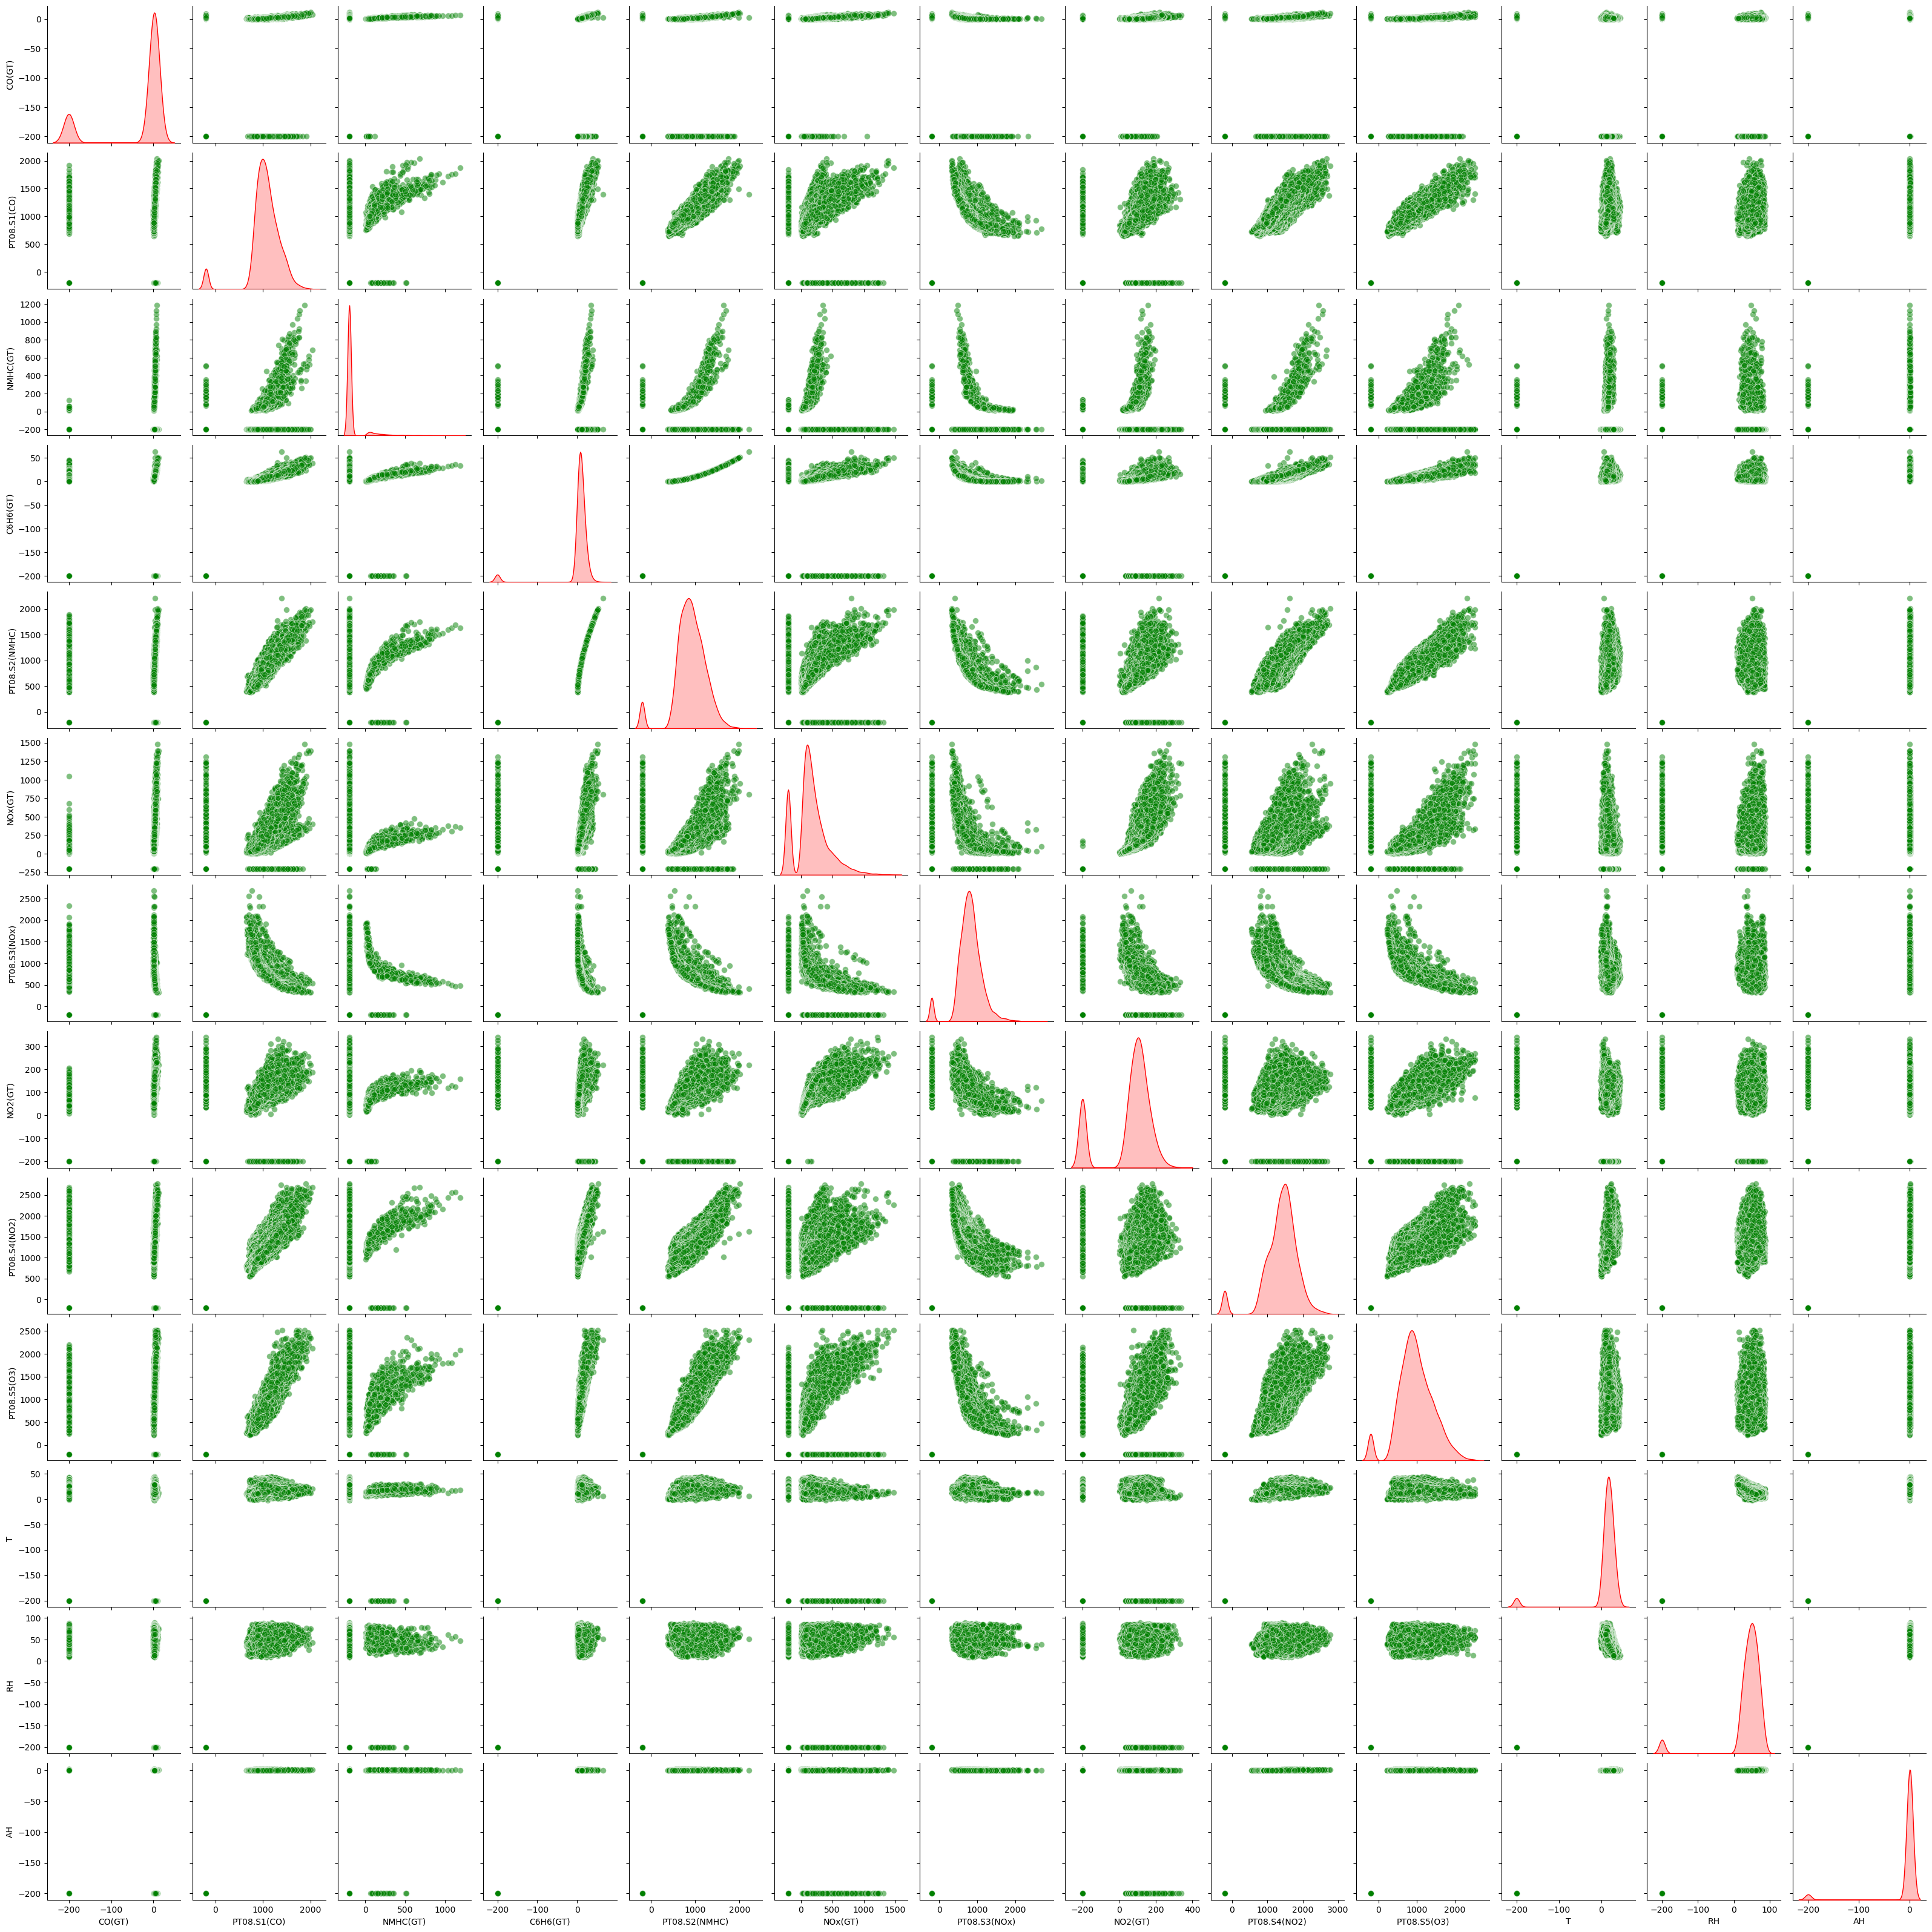

In [52]:
sns.pairplot(df, diag_kind='kde',plot_kws=dict(s=50,edgecolor="w",color="g",alpha=.5),diag_kws=dict(fill=True,color="r"))
plt.show()